___
## Ciência dos Dados - PROJETO 3 - INSPER

___
#### Gabriel Duarte

#### Beni Stern

#### Henrique Thome

#### Christiano Borge

___

# TEMA AQUI

___

## A. INTRODUÇÃO

[Detalhe aqui o objetivo deste projeto!!]

O futebol moderno nasceu em meados do século XIX e desde então não para de ganhar importância. Com o tempo, devido aos adventos do capitalismo esse esporte se tornou um grande mercado internacional com valores de transferências batendo a casa do bilhão de real, com enfoque nos últimos 5 anos, no qual as cifras aumentaram drasticamente.
Devido a esse forte aumento nos valores da transferência surgem teorias e desconfianças de que alguns jogadores tem seus valores aumentados como uma forma de lavar dinheiro.
Dessa forma esse projeto tem o objetivo de modelar a precificação  dos atletas para servir tanto como uma ferramenta para os dirigentes consultarem o preço de mercado dos atletas quanto para órgãos governamentais consultarem suspeitas de lavagem de dinheiro

___
## B. MINERANDO DADOS e CARACTERÍSTICAS DO DATASET

[Detalhe aqui as características da base de dados além da análise descritiva.]

In [2]:
import pandas as pd
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm, probplot
from scipy import stats
import statsmodels.api as sm
%matplotlib

Using matplotlib backend: Qt5Agg


In [3]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Beni Stern\Desktop\CDD\Projeto-3-Ciencia-dos-Dados


### BASE DE DADOS

In [4]:
dados = pd.read_csv("data.csv")
dados.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [73]:
def Filtro(dados,coluna):
    lista = []
    for e in dados[coluna]:
        str_e = str(e)
        novo = str_e.replace("€","").replace("M","").replace("K","").replace("lbs","").replace("'",".").replace("+3","").replace("+2","").replace("+5","").replace("+4","")
        lista.append(float(novo))
    
    return lista

In [82]:
VariaveisEscolhidas = ["Release Clause",'ID','Age','Overall','Potential','Value','Wage','Special','International Reputation','Weak Foot','Skill Moves','Jersey Number','Height','Weight','LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM','RCM','RM','LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB','Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys','Dribbling','Curve','FKAccuracy','LongPassing','BallControl','Acceleration','SprintSpeed','Agility','Reactions','Balance','ShotPower','Jumping','Stamina','Strength','LongShots','Aggression','Interceptions','Positioning','Vision','Penalties','Composure','Marking','StandingTackle','SlidingTackle','GKDiving','GKHandling','GKKicking','GKPositioning','GKReflexes']
for e in VariaveisEscolhidas:
    dados[e] = pd.DataFrame(Filtro(dados,e))
dados[VariaveisEscolhidas].head()

,Release Clause,ID,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,226.5,158023.0,31.0,94.0,94.0,110.5,565.0,2202.0,5.0,4.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,127.1,20801.0,33.0,94.0,94.0,77.0,405.0,2228.0,5.0,4.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,228.1,190871.0,26.0,92.0,93.0,118.5,290.0,2143.0,5.0,5.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,138.6,193080.0,27.0,91.0,93.0,72.0,260.0,1471.0,4.0,3.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,196.4,192985.0,27.0,91.0,92.0,102.0,355.0,2281.0,4.0,5.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


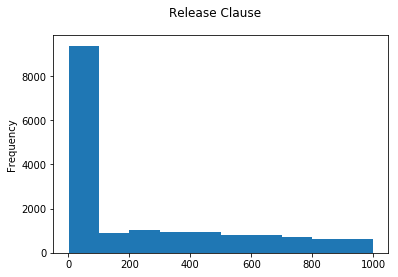

In [69]:
dados['Release Clause'].plot.hist()
plt.suptitle("Release Clause");

In [83]:
dados[variaveis].corr()

,Release Clause,ID,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
Release Clause,1.000000,0.089067,-0.041166,-0.392288,-0.385456,0.280187,-0.214962,-0.245869,-0.167478,-0.076770,...,-0.154118,-0.288178,-0.078932,-0.068519,-0.058001,0.018236,0.020020,0.020183,0.017978,0.020064
ID,0.089067,1.000000,-0.739208,-0.417025,0.047074,0.081168,-0.204610,-0.231352,-0.356191,-0.075784,...,-0.140657,-0.384473,-0.110198,-0.085929,-0.068409,-0.105594,-0.111149,-0.106652,-0.118250,-0.105778
Age,-0.041166,-0.739208,1.000000,0.452350,-0.253312,-0.048715,0.141145,0.236695,0.253765,0.059867,...,0.139535,0.391023,0.142817,0.119745,0.103089,0.101277,0.106419,0.104964,0.116402,0.103313
Overall,-0.392288,-0.417025,0.452350,1.000000,0.660939,-0.233330,0.571926,0.606960,0.499491,0.212015,...,0.341429,0.727655,0.286505,0.252629,0.222811,-0.025937,-0.025062,-0.029372,-0.017674,-0.023276
Potential,-0.385456,0.047074,-0.253312,0.660939,1.000000,-0.231048,0.486413,0.383727,0.372993,0.162346,...,0.224281,0.440008,0.162801,0.143564,0.128980,-0.053446,-0.054672,-0.059061,-0.052589,-0.053341
Value,0.280187,0.081168,-0.048715,-0.233330,-0.231048,1.000000,-0.247034,-0.110484,-0.207609,-0.049825,...,-0.073403,-0.168506,-0.024605,-0.017774,-0.013020,-0.036351,-0.037841,-0.035582,-0.036806,-0.034435
Wage,-0.214962,-0.204610,0.141145,0.571926,0.486413,-0.247034,1.000000,0.347835,0.668635,0.140849,...,0.222440,0.419597,0.145594,0.126291,0.111025,-0.025595,-0.025177,-0.028325,-0.025489,-0.025992
Special,-0.245869,-0.231352,0.236695,0.606960,0.383727,-0.110484,0.347835,1.000000,0.292208,0.341855,...,0.734533,0.752331,0.561866,0.538802,0.506968,-0.674637,-0.673625,-0.670254,-0.668272,-0.673238
International Reputation,-0.167478,-0.356191,0.253765,0.499491,0.372993,-0.207609,0.668635,0.292208,1.000000,0.128317,...,0.218620,0.392787,0.115208,0.092846,0.079176,0.004526,0.003942,0.000651,0.006904,0.003444
Weak Foot,-0.076770,-0.075784,0.059867,0.212015,0.162346,-0.049825,0.140849,0.341855,0.128317,1.000000,...,0.330252,0.278132,0.065673,0.042646,0.026105,-0.231905,-0.233098,-0.229395,-0.231298,-0.232574


In [94]:
def regress(X,Y):
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    return results

variaveis = ['ID','Age','Overall','Potential','Value','Wage','Special','International Reputation','Weak Foot','Skill Moves','Jersey Number','Height','Weight','LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM','RCM','RM','LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB','Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys','Dribbling','Curve','FKAccuracy','LongPassing','BallControl','Acceleration','SprintSpeed','Agility','Reactions','Balance','ShotPower','Jumping','Stamina','Strength','LongShots','Aggression','Interceptions','Positioning','Vision','Penalties','Composure','Marking','StandingTackle','SlidingTackle','GKDiving','GKHandling','GKKicking','GKPositioning','GKReflexes']

y = dados['Release Clause']
x = dados[variaveis]

results = regress(x,y)
results.summary()

D:\Insper\lib\site-packages\numpy\core\_methods.py:153: RuntimeWarning: invalid value encountered in reduce
  umr_maximum(a, axis, None, out, keepdims),
D:\Insper\lib\site-packages\numpy\core\_methods.py:154: RuntimeWarning: invalid value encountered in reduce
  umr_minimum(a, axis, None, None, keepdims),


MissingDataError: exog contains inf or nans

### ANÁLISE DESCRITIVA

___
## C. MODELOS DE PREDIÇÃO

o MODELO DE PREDIÇÃO PELA MÉDIA (Sem uso de variável explicativa).

o MODELO DOS K VIZINHOS MAIS PRÓXIMOS (K-Nearest Neighbors Regression)

o MODELO DE REGRESSÃO LINEAR (Multiple Linear Regression)

o MODELO DE ÁRVORES DE REGRESSÃO (Decision Tree Regression)

___
## D. PROCESSO E ESTATÍSTICAS DE VALIDAÇÃO

[Esse item depende dos resultados das modelagens anteriores! Organize-os aqui de forma clara!]

___
## E. CONCLUSÃO

___
## F. REFERÊNCIAS BIBLIOGRÁFICAS